# Exploratory Data Analysis

In [733]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [734]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [735]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#putting features and target into one dataframe
data = pd.concat([X, y], axis=1)

#target variable is numeric
data[y.columns[0]] = data[y.columns[0]].map({'B': 0, 'M': 1})


In [736]:
#information about the dataset
print("Dataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64

## Summary Statistics

##### Variables with the higher standard deviation (>1): radius1 (3.524049), texture1 (4.301036), perimeter1 (24.298981), area1 (351.914129), perimeter2 (2.021855), area2 (45.491006), radius3 (4.833242), texture3 (6.146258), perimeter3 (33.602542), area3 (569.356993)


In [738]:
import pandas as pd
pd.set_option('display.max_columns', None) 

#summary statistics
print("\nSummary Statistics:")
print(data.describe())

#missing values check
print("\nMissing Values:")
print(data.isnull().sum())





Summary Statistics:
          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920

## Bar Plot of Diagnosis
##### More of the data has a diagnosis of a benign. (More benign cases than malignant ones)
##### 357 Benign Cases and 212 Malignant Cases

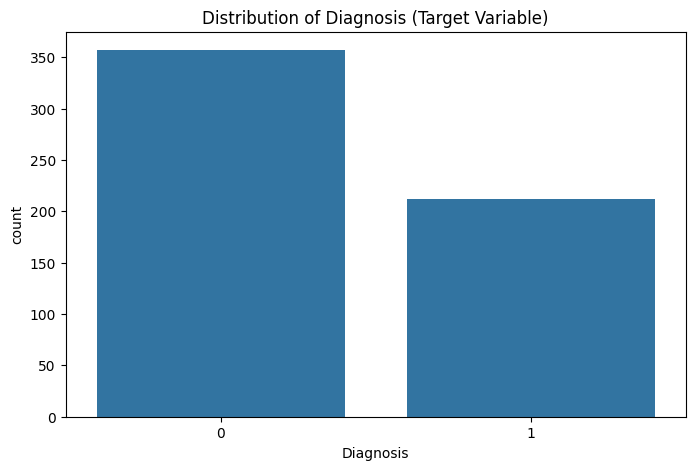

Diagnosis
B            357
M            212
Name: count, dtype: int64


In [740]:
#distribution of the target variable - 
plt.figure(figsize=(8, 5))
sns.countplot(x=y.columns[0], data=data)
plt.title("Distribution of Diagnosis (Target Variable)")
plt.show()

print(y.value_counts())

#the distribution of the diagnosis. 0 means bengign diagnosis and 1 means malignant dianosis. 
#We can see that there is more benign diagnosis compared to malignant diagnosis. 

## Correlation Matrix
##### too many variables - could use PCA to reduce dimensions?
##### the variables that are negativel correlated are fractal_dimension1, texture2, smoothness2, symmetry2, and fractal_dimension2.
##### positively correlated are radius1, perimeter1, area1, compactness1, concavity1, concave_points1, radius2, area2, perimeter2, radius3, perimeter3, area3, compactness3, concavity3, concave_points3

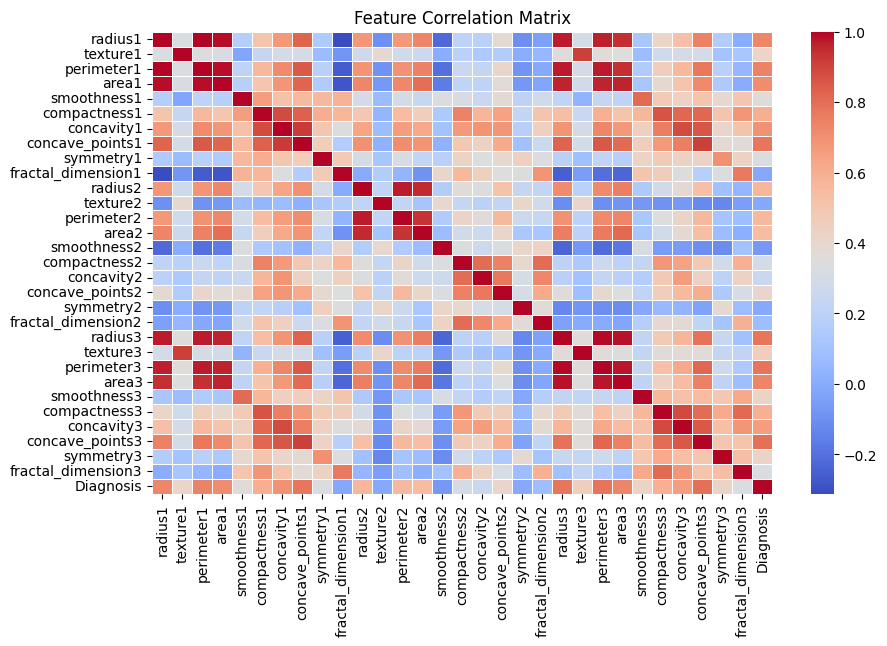

In [742]:
#correlation matrix
plt.figure(figsize=(10, 6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()



## Pair Plot
##### From looking at the pair plots, there seems to be some grouping between bengign and maligant groups in some of the plots. 
##### Some of the plots seem to have a linear relationship, some have a slight curve but still could be linear, and some plots look to have no relation. 

In [744]:
#feature names
print("\nColumn Names in Dataset:")
print(data.columns)


# Pair plot for all features
# sns.pairplot(data, hue=y.columns[0], diag_kind='kde')
#plt.show()

#blue - bengign
#red - malignant


Column Names in Dataset:
Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


# Model Train and Test

In [746]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

#split data into features and target
target_col = 'Diagnosis'  
X = data.drop(columns=[target_col])  
y = data[target_col]  



#split training and testing data into 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#feature scaling
#scaling data to ensure all features contribute equally to model fitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for feature selection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


# Models (LG, LDA, QDA, NB, GAM)

In [748]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from pygam import LogisticGAM
from sklearn.utils.class_weight import compute_sample_weight

#calculate sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# models
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
lda = LinearDiscriminantAnalysis() 
qda = QuadraticDiscriminantAnalysis() 
nb = GaussianNB() 
gam = LogisticGAM()

# trained models
log_reg.fit(X_train_scaled, y_train)
lda.fit(X_train_scaled, y_train)
qda.fit(X_train_scaled, y_train)
nb.fit(X_train_scaled, y_train)
gam.fit(X_train_scaled, y_train, weights=sample_weights)

# create predictions
models = {
    'Logistic Regression': log_reg,
    'LDA': lda,
    'QDA': qda,
    'Naive Bayes': nb,
    'GAM': gam
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("=" * 50)

# cross-validation scores, split in 5 groups
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


did not converge
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[71  1]
 [ 2 40]]
Model: LDA
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[72  0]
 [ 4 38]]
Model: QDA
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.9

##### The best model fit for our data is Logistic Regression because it had the highest accuracy and lowest cross-validation variance. From the Confusion Matrix, we can see we the model correctly identified 71 instances as benign diagnosis. The model classified 1 malignant diagnosis as benign. The model missed 2 instances of malignant diagnosis, classifying them as benign. The model correctly identified 40 instances as benign diagnosis. However in this model, compared to logistic regression, there is a lower cross validation accuracy. This suggests that during cross validation, there was some overfitting or oversensitivity to some folds. 
##### QDA and Naive Bayes show higher variance given in the cross-validation standard deviation, meaning they may be overfitting slightly. LDA seems to underfit slightly with higher false positives.

##### The Generalized Additive Model also is a good model to look at as it has the highest accuracy of 97% (same as logistic regression). From the Confusion Matrix, we can see we the model correctly identified 71 instances as benign diagnosis. The model classified 1 malignant diagnosis as benign. The model missed 2 instances of malignant diagnosis, classifying them as benign. The model correctly identified 40 instances as benign diagnosis. However in this model, compared to logistic regression, there is a lower cross validation accuracy. This suggests that during cross validation, there was some overfitting or oversensitivity to some folds. 


# Model Fitting (Logistic Regression and Feature Selection from Forward Selection)

In [751]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import pandas as pd 

#forward selection
def forward_selection(X, y, significance_level=0.05):
    selected = []
    remaining = list(X.columns)
    
    while remaining:
        p_values = {}
        for feature in remaining:
            model = sm.Logit(y, sm.add_constant(X[selected + [feature]])).fit(disp=0)
            p_values[feature] = model.pvalues.get(feature, 1)  # Safe fallback
        
        best_feature = min(p_values, key=p_values.get)
        if p_values[best_feature] < significance_level:
            selected.append(best_feature)
            remaining.remove(best_feature)
        else:
            break
    
    return selected
    
y_train_fs = y_train.reset_index(drop=True)

#selected features
selected_features = forward_selection(X_train_scaled_df, y_train_fs)
print("Selected Features from Forward Selection:", selected_features)

# Train Logistic Regression using the selected features
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled_df[selected_features], y_train)

# Evaluate Logistic Regression model on test set
y_pred = log_reg.predict(X_test_scaled_df[selected_features])
print("Logistic Regression Model Evaluation with Forward Selection Predictors:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Selected Features from Forward Selection: ['concavity1', 'concave_points1', 'texture3', 'perimeter3', 'radius2', 'texture2', 'compactness2']
Logistic Regression Model Evaluation with Forward Selection Predictors:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[70  2]
 [ 4 38]]
GAM Cross-Validation Accuracy: 0.974 ± 0.013


##### The features that were selected from forward selection are concavity1, concave_points1, texture3, perimeter3, radius2, texture2, and compactness2. 
##### For benign diagnosis, there was a precision of 95% of true positive predictions out of all predicted positives. It had a 97% recall, meaning the proportion of true positive predictions out of all actual positives. There was a f-1 score of 96% of good balance between harmonic mean of precision and recall.
##### For malignant diagnosis, there was a precision of 95% of true positive predictions out of all predicted positives. It had a 90% recall, meaning the proportion of true positive predictions out of all actual positives. There was a f-1 score of 93% of good balance between harmonic mean of precision and recall.
##### The overall accuracy was 95%. 
##### The confusion matrix shows that 70 of instances were correctly predicted in bengign diagnosis that belonged to bengign diagnosis. There were 2 false positive where it was actually benign diagnosis when wrongly predicted in malignant diagnosis. (Type 1 error). There were 4 false negatives where it was actually malignant diagnosis but wrongly predicted as benign diagnosis. (Type 2 error). We got 38 true positives where malignant diagnosis was correctly predicted as malignant diagnosis.

# Model Fit - GAM and Forward Selection

In [754]:
from pygam import LogisticGAM, s, f

# Train Logistic GAM using the selected features
gam = LogisticGAM()
gam.fit(X_train_scaled_df[selected_features], y_train, weights=sample_weights)

# Evaluate Logistic GAM model on test set
y_pred = gam.predict(X_test_scaled_df[selected_features])
print("Logistic GAM Model Evaluation with Forward Selection Predictors:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation scores
scores = cross_val_score(gam, X_train_scaled_df[selected_features], y_train, cv=5)
print(f"GAM Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


Logistic GAM Model Evaluation with Forward Selection Predictors:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[72  0]
 [ 3 39]]
GAM Cross-Validation Accuracy: 0.626 ± 0.027


/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/opt/anaconda3/lib/python3.12/site-packages/pygam/pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2


##### The Generalized Additive Model (class-weighted) with forward selected variables accuracy of 97%. From the Confusion Matrix, we can see we the model correctly identified 72 instances as benign diagnosis. The model classified 0 malignant diagnosis as benign. The model missed 3 instances of malignant diagnosis, classifying them as benign. The model correctly identified 39 instances as benign diagnosis. There is a lower cross validation accuracy. This suggests that during cross validation, there was some overfitting or oversensitivity to some folds. 


# Feature Selection Lasso

In [757]:
#Lasso Regression

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Fit LassoCV for feature selection
lasso_cv = LassoCV(cv=5, max_iter=5000).fit(X_train_scaled_df, y_train)

# Get Lasso coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.coef_
})

# Display all coefficients
print("Lasso Coefficients:")
print(lasso_coefficients)

# Select features with non-zero coefficients
selected_features_lasso = lasso_coefficients.loc[lasso_coefficients['Coefficient'] != 0, 'Feature'].tolist()
print(f"\nSelected Features: {selected_features_lasso}")

# Get the count of selected features
count_selected_features = len(selected_features_lasso)
print(f"\nNumber of Selected Features: {count_selected_features}")

Lasso Coefficients:
               Feature  Coefficient
0              radius1     0.000000
1             texture1     0.012976
2           perimeter1     0.000000
3                area1    -0.010851
4          smoothness1    -0.000000
5         compactness1    -0.147153
6           concavity1     0.042278
7      concave_points1     0.137101
8            symmetry1    -0.012042
9   fractal_dimension1    -0.001073
10             radius2     0.132667
11            texture2    -0.000000
12          perimeter2    -0.000000
13               area2    -0.081684
14         smoothness2     0.038391
15        compactness2    -0.044020
16          concavity2    -0.078155
17     concave_points2     0.065287
18           symmetry2    -0.002965
19  fractal_dimension2    -0.011227
20             radius3     0.509838
21            texture3     0.055831
22          perimeter3     0.000000
23               area3    -0.324576
24         smoothness3     0.017752
25        compactness3    -0.000000
26      

##### Using the Lasso method for feature selection, it selected a total of 22 features out of 30. The features it selected were 'texture1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'area3', 'smoothness3', 'concavity3', 'symmetry3', and 'fractal_dimension3'. 

# Model Fitting Logistic Regression with Lasso Feature Selection

In [760]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Select only the columns corresponding to selected features
X_train_selected_lasso = X_train_scaled_df[selected_features_lasso]

# Train Logistic Regression model using the selected features
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_selected_lasso, y_train)

# Make predictions on the training set
y_pred = log_reg.predict(X_train_selected_lasso)

# Evaluate the model
print("Logistic Regression Model Evaluation with Lasso Features:")
print(classification_report(y_train, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))


scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression Model Evaluation with Lasso Features:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       0.98      0.98      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

Confusion Matrix:
[[282   3]
 [  3 167]]
GAM Cross-Validation Accuracy: 0.974 ± 0.013


##### Using the features from the Lasso method, we fit the Logistic Regression Model (class-weighted) where we got an overall 99% accuracy. From the confusion matrix, the model correctly identified 282 instances as benign diagnosis. There were 3 incorrect prediction where the model classified a benign diagnosis as malignant diagnosis. The model missed 3 instances of malignant diagnosis, incorrectly classifying them as benign diagnosis. The model correctly identified 167 instances as malignant diagnosis.

# Model Fitting - GAM with Lasso 

In [763]:

X_train_selected_gam = X_train_scaled_df[selected_features_lasso]
X_test_selected_gam = X_test_scaled_df[selected_features_lasso]

#Generalized Additive Model (GAM) using selected features
gam = LogisticGAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+s(10)+s(11)+ s(12)+ s(13)+ s(14)+s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21))  
gam.fit(X_train_selected_gam.to_numpy(), y_train, weights=sample_weights)

# Evaluate the model on the test set
y_pred = gam.predict(X_test_selected_gam.to_numpy())

print("GAM Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


scores = cross_val_score(gam, X_train_scaled, y_train, cv=5)
print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/opt/anaconda3/lib/python3.12/site-packages/pygam/pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:134: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/opt/anaconda3/lib/python3.12/site-packages/pygam/links.py:149: RuntimeWarning: overflow encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/opt/anaconda3/lib/python3.12/site-packages/pygam/pygam.py:627: RuntimeWarning: overflow encountered in square
  self.link.gradient(mu, self.distribution) ** 2


did not converge
GAM Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[70  2]
 [ 3 39]]
GAM Cross-Validation Accuracy: 0.626 ± 0.027


/opt/anaconda3/lib/python3.12/site-packages/pygam/utils.py:799: RuntimeWarning: divide by zero encountered in divide
  out[mask] = y[mask] * np.log(y[mask] / u[mask])


##### Using the features from the Lasso method, we fit the GAM (class-weighted) where we got an overall 96% accuracy. From the confusion matrix, the model correctly identified 70 instances as benign diagnosis. There were 2 incorrect prediction where the model classified a benign diagnosis as malignant diagnosis. The model missed 3 instances of malignant diagnosis, incorrectly classifying them as benign diagnosis. The model correctly identified 39 instances as malignant diagnosis.

In [765]:
#GAM
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd
from pygam import LinearGAM, s  # pyGAM for Generalized Additive Models

# DataFrame with the selected features (with threshold)
X_train_selected = X_train_scaled_df[selected_features_lasso]
X_test_selected = X_test_scaled_df[selected_features_lasso]

# Dynamically add smooth terms for all selected features
terms = s(0)
for i in range(1, len(selected_features_lasso)):
    terms += s(i)

# Fit the GAM model
gam = LinearGAM(terms).fit(X_train_selected.values, y_train, weights=sample_weights)

# Evaluate and summarize the GAM model
print("GAM Model Summary:")
print(gam.summary())

# Predict using the fitted GAM model
y_pred_gam = gam.predict(X_test_selected.values)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_gam)
r2 = r2_score(y_test, y_pred_gam)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

GAM Model Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    162.4201
Link Function:                     IdentityLink Log Likelihood:                                 -4104.5357
Number of Samples:                          455 AIC:                                             8535.9116
                                                AICc:                                            8720.8492
                                                GCV:                                                 0.076
                                                Scale:                                              0.0296
                                                Pseudo R-Squared:                                   0.9285
Feature Function  

/var/folders/j8/vpgy5cl96b93692bcgcpxrwh0000gn/T/ipykernel_24351/3976905057.py:21: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


# Feature Selection Ridge

In [767]:
#Ridge Regression

from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Fit RidgeCV for feature selection
ridge_cv = RidgeCV(alphas=[0.1, 1, 10], store_cv_values=True).fit(X_train_scaled_df, y_train)

# Get Ridge coefficients
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_cv.coef_
})

# Display all coefficients
print("Ridge Coefficients:")
print(ridge_coefficients)

# Select features with non-zero coefficients
selected_features_ridge = ridge_coefficients.loc[ridge_coefficients['Coefficient'] != 0, 'Feature'].tolist()
print(f"\nSelected Features (Ridge): {selected_features_ridge}")

# Get the count of selected features
count_selected_features = len(selected_features_ridge)
print(f"\nNumber of Selected Features: {count_selected_features}")

#Consider scaling the threshold dynamically based on the coefficient distribution
# Set threshold as, for example, 10% of the max coefficient
dynamic_threshold = 0.1 * abs(ridge_cv.coef_).max()
selected_ridge_features = ridge_coefficients.loc[
    abs(ridge_coefficients['Coefficient']) > dynamic_threshold, 'Feature'
].tolist()

print(f"Selected Features (Ridge with dynamic threshold): {selected_ridge_features}")
print(f"\nNumber of Selected Features: {len(selected_ridge_features)}")


scores = cross_val_score(ridge_cv, X_train_scaled, y_train, cv=5)
print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Ridge Coefficients:
               Feature  Coefficient
0              radius1     0.086072
1             texture1     0.012171
2           perimeter1     0.101647
3                area1    -0.158944
4          smoothness1    -0.009787
5         compactness1    -0.170458
6           concavity1     0.071814
7      concave_points1     0.146259
8            symmetry1    -0.022171
9   fractal_dimension1    -0.000646
10             radius2     0.187021
11            texture2    -0.002256
12          perimeter2    -0.019340
13               area2    -0.104846
14         smoothness2     0.038061
15        compactness2    -0.032319
16          concavity2    -0.095521
17     concave_points2     0.080631
18           symmetry2    -0.010919
19  fractal_dimension2    -0.025002
20             radius3     0.332867
21            texture3     0.057090
22          perimeter3     0.045262
23               area3    -0.232811
24         smoothness3     0.028883
25        compactness3    -0.025832
26      

##### Ridge Regression won't shrink the coefficients all the way to zero so all of the selected features that were non-zero were orginally all 30 predictor variables since they were non-zero. We set a threshold that is dynamically set based on the distribution of the coefficients from the Ridge regression model. Specifically, the threshold is calculated as 10% of the maximum absolute value of the coefficients. Through this, we obtained 18 selected features: 'radius1', 'perimeter1', 'area1', 'compactness1', 'concavity1', 'concave_points1', 'radius2', 'area2', 'smoothness2', 'concavity2', 'concave_points2', 'radius3', 'texture3', 'perimeter3', 'area3', 'concavity3', 'symmetry3', 'fractal_dimension3'

# Model Fit Logistic Regression with Ridge (threshold)

In [770]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Select only the columns corresponding to selected features
X_train_selected_ridge = X_train_scaled_df[selected_ridge_features]

# Train Logistic Regression model using the selected features
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_selected_ridge, y_train)

# Make predictions on the training set
y_pred = log_reg.predict(X_train_selected_ridge)

# Evaluate the model
print("Logistic Regression Model Evaluation with Ridge Features:")
print(classification_report(y_train, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression Model Evaluation with Ridge Features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       285
           1       0.97      0.98      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

Confusion Matrix:
[[280   5]
 [  4 166]]
GAM Cross-Validation Accuracy: 0.974 ± 0.013


##### Using the features from the Ridge method, we fit the logistic regression (class-weighted) where we got an overall 98% accuracy. From the confusion matrix, the model correctly identified 280 instances as benign diagnosis. There were 5 incorrect prediction where the model classified a benign diagnosis as malignant diagnosis. The model missed 4 instances of malignant diagnosis, incorrectly classifying them as benign diagnosis. The model correctly identified 166 instances as malignant diagnosis.

# Model Fitting (GAM with Features from Ridge)

In [781]:
#GAM
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel
import pandas as pd
from pygam import LinearGAM, s  # pyGAM for Generalized Additive Models

# DataFrame with the selected features (with threshold)
X_train_selected = X_train_scaled_df[selected_ridge_features]
X_test_selected = X_test_scaled_df[selected_ridge_features]

# Dynamically add smooth terms for all selected features
terms = s(0)
for i in range(1, len(selected_ridge_features)):
    terms += s(i)

# Fit the GAM model
gam = LinearGAM(terms).fit(X_train_selected.values, y_train, weights=sample_weights)

# Evaluate and summarize the GAM model
print("GAM Model Summary:")
print(gam.summary())

# Predict using the fitted GAM model
y_pred_gam = gam.predict(X_test_selected.values)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_gam)
r2 = r2_score(y_test, y_pred_gam)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


y_pred_class = (y_pred_gam > 0.5).astype(int)  # You can adjust the threshold if needed

# Evaluate overall accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_class)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))



GAM Model Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    125.5548
Link Function:                     IdentityLink Log Likelihood:                                 -4347.8986
Number of Samples:                          455 AIC:                                             8948.9069
                                                AICc:                                            9047.5046
                                                GCV:                                                 0.063
                                                Scale:                                              0.0328
                                                Pseudo R-Squared:                                   0.9108
Feature Function  

/var/folders/j8/vpgy5cl96b93692bcgcpxrwh0000gn/T/ipykernel_24351/807328895.py:21: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


##### Using the features from the Ridge method, we fit the GAM (class-weighted) where we got an overall 96% accuracy. From the confusion matrix, the model correctly identified 71 instances as benign diagnosis. There were 1 incorrect prediction where the model classified a benign diagnosis as malignant diagnosis. The model missed 3 instances of malignant diagnosis, incorrectly classifying them as benign diagnosis. The model correctly identified 39 instances as malignant diagnosis.

# Feature Selection from Random Forest

In [783]:
#random forest

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train_scaled_df, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:")
print(feature_importances.head(16))

# Select features above a certain importance threshold
threshold = 0.02  # Adjust this based on the plot
selected_rf_features = feature_importances.loc[
    feature_importances['Importance'] > threshold, 'Feature'
].tolist()

print("Selected Features (Random Forest):", selected_rf_features)
print("Number of Selected Features:", len(selected_rf_features))

# Subset the data
X_train_rf_selected = X_train_scaled_df[selected_rf_features]
X_test_rf_selected = X_test_scaled_df[selected_rf_features]


Top Features by Importance:
               Feature  Importance
22          perimeter3    0.365423
27     concave_points3    0.153337
7      concave_points1    0.139083
20             radius3    0.138357
23               area3    0.043627
21            texture3    0.024041
1             texture1    0.023191
3                area1    0.015264
24         smoothness3    0.014627
13               area2    0.012991
28           symmetry3    0.009329
26          concavity3    0.008237
19  fractal_dimension2    0.005291
6           concavity1    0.004110
10             radius2    0.003919
14         smoothness2    0.003889
Selected Features (Random Forest): ['perimeter3', 'concave_points3', 'concave_points1', 'radius3', 'area3', 'texture3', 'texture1']
Number of Selected Features: 7


##### From the Random Forest feature selection, we obtained 7 selected features: 'perimeter3', 'concave_points3', 'concave_points1', 'radius3', 'area3', 'texture3', 'texture1''

##### We do this by building 100 decision trees in the forest and we set a threshold and select features with importance greater than 0.02. 

##### Random Forests for feature selection handles non-linearity, handles correlated features, and considers interactions between features. 


# Model Fit - Logistic Regression and Random Forest

In [785]:

# Select only the columns corresponding to selected features
X_train_selected_rf = X_train_scaled_df[selected_rf_features]

# Train Logistic Regression model using the selected features
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_selected_rf, y_train)

# Make predictions on the training set
y_pred = log_reg.predict(X_train_selected_rf)

# Evaluate the model
print("Logistic Regression Model Evaluation with Random Forest Features:")
print(classification_report(y_train, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression Model Evaluation with Random Forest Features:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       285
           1       0.95      0.97      0.96       170

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

Confusion Matrix:
[[277   8]
 [  5 165]]
GAM Cross-Validation Accuracy: 0.974 ± 0.013


##### Using the features from the Random Forest method, we fit the logistic regression (class-weighted) where we got an overall 97% accuracy. From the confusion matrix, the model correctly identified 277 instances as benign diagnosis. There were 8 incorrect prediction where the model classified a benign diagnosis as malignant diagnosis. The model missed 5 instances of malignant diagnosis, incorrectly classifying them as benign diagnosis. The model correctly identified 165 instances as malignant diagnosis.

# Model Fit - GAM and Random Forest

In [789]:
# DataFrame with the selected features (with threshold)
X_train_selected = X_train_scaled_df[selected_rf_features]
X_test_selected = X_test_scaled_df[selected_rf_features]

# Dynamically add smooth terms for all selected features
terms = s(0)
for i in range(1, len(selected_rf_features)):
    terms += s(i)

# Fit the GAM model
gam = LinearGAM(terms).fit(X_train_selected.values, y_train, weights=sample_weights)

# Evaluate and summarize the GAM model
print("GAM Model Summary:")
print(gam.summary())

# Predict using the fitted GAM model
y_pred_gam = gam.predict(X_test_selected.values)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_gam)
r2 = r2_score(y_test, y_pred_gam)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


y_pred_class = (y_pred_gam > 0.5).astype(int)  # You can adjust the threshold if needed

# Evaluate overall accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_class)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))


GAM Model Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     63.4277
Link Function:                     IdentityLink Log Likelihood:                                 -4256.4639
Number of Samples:                          455 AIC:                                              8641.783
                                                AICc:                                             8663.424
                                                GCV:                                                0.0554
                                                Scale:                                              0.0417
                                                Pseudo R-Squared:                                   0.8651
Feature Function  

/var/folders/j8/vpgy5cl96b93692bcgcpxrwh0000gn/T/ipykernel_24351/1917710412.py:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


##### Using the features from the Random Forest method, we fit the GAM (class-weighted) where we got an overall 96% accuracy. From the confusion matrix, the model correctly identified 72 instances as benign diagnosis. There were 0 incorrect prediction where the model classified a benign diagnosis as malignant diagnosis. The model missed 4 instances of malignant diagnosis, incorrectly classifying them as benign diagnosis. The model correctly identified 38 instances as malignant diagnosis.

In [ ]:
#logistic regression model
#forward selection
#lasso
#ridge
#random forest


#gam model 
#forward selection
#lasso
#ridge
#random forest


#lasso 
#Ridge
#gam -> model fitting (generalized additive models)

#random forest